In [281]:
import pandas as pd
import numpy as np



class Capa:
    def __init__(self, num_neuronas : int, cant_conn : int, activation = None, entrada, ocultas):
        self.num_neuronas = num_neuronas
        self.activation = activation
        self.b = np.random.rand(1, num_neuronas) * 2 - 1
        self.w = np.random.rand(cant_conn, num_neuronas)
        print(self.w)

    def custom_rand(entrada, ocultas):
        r = (6/(entrada + ocultas)) ** (0.5)
        return (np.random.uniform(low=ocultas, high=entrada) * 2 * r - r)

def custom_activation(x):
    return x * np.exp(-0.5 * np.power(x, 2))

In [283]:
p = 1 # numero de valores de entrada
ocultas = 40
entrada = 41

l0 = Capa(num_neuronas=5, cant_conn = p, activation=custom_activation, ocultas=ocultas, entrada=entrada)
l0 = Capa(num_neuronas=10, cant_conn = 5, activation=custom_activation, ocultas=ocultas, entrada=entrada)
l0 = Capa(num_neuronas=3, cant_conn = 10, activation=custom_activation, ocultas=ocultas, entrada=entrada)


TypeError: __init__() got an unexpected keyword argument 'ocultas'

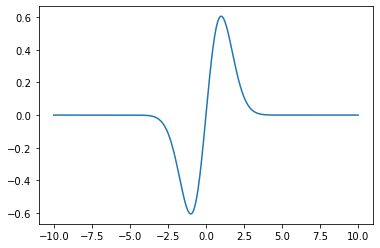

In [19]:
import matplotlib.pyplot as plt
_x = np.linspace(-10, 10, 1000)
plt.plot(_x, custom_activation(_x))

In [27]:

def crear_nn(shape, activation):
    capas = []
    for i, dim in enumerate(shape[:-1]):
        layer = Capa(num_neuronas=shape[i], cant_conn = shape[i+1], activation=activation)
        capas.append(layer)
    return capas

shape = [p, 4, 2, 1]
red_neuronal = crear_nn(shape, custom_activation)

[[0.68772388]
 [0.11238982]
 [0.25808133]
 [0.90580668]]
[[9.67584803e-01 2.69621414e-01 2.02078814e-04 5.25554428e-01]
 [4.72146099e-01 7.78255044e-01 1.07771389e-01 5.68426823e-01]]
[[0.50526426 0.62527974]]


In [42]:
cost = lambda Yp, Yr: np.mean((Yr - Yp) ** 2)

def forward_pass(capas, X):
    out = [(None, X)]
    for l, capa in enumerate(capas):
        z = out[-1][1] #@ capas[l].w + capas[l].b
        a = capas[l].activation(z)
        out.append((z, a)) 
    return out
#def train(capas, X, Y, cost, n_part, max_iter, penalidad):
res = forward_pass(red_neuronal, [3])
print(cost(res[-1][1], [0.020]))

0.0001766244931368528


In [47]:
import pandas as pd

df = pd.read_csv("./KDDTrain+_20Percent.txt", header=None)
df.head()

df[41] = df[41].apply(lambda y: 1 if y == "normal" else -1)
Y = df[41]

for i in [1, 2, 3]:
    df[i] = df[i].astype("category")
    df[i] = df[i].cat.codes

#for i in (list(range(4, 40)) + [0, 42]):
#    df[i]=((df[i]-df[i].min())/(df[i].max()-df[i].min()))*1

# Dejamos la categoría al último
df[[41, 42]] = df[[42, 41]]
df.to_csv("train.csv", header=None, index=False)
df = df.dropna(axis=0)
df.drop(42, axis=1)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,1,19,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,1
1,0,2,41,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1
2,0,1,46,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,-1
3,0,1,22,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1
4,0,1,22,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1


In [45]:
df = pd.read_csv("train.csv", header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1,19,9,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,1
1,0.0,2,41,9,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,1
2,0.0,1,46,5,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,-1
3,0.0,1,22,9,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,1
4,0.0,1,22,9,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,1
